## Feature distribution and models

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

from nltk import word_tokenize
from pymorphy2 import MorphAnalyzer

from statistics import mean
from random import choices

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

m = MorphAnalyzer()

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
pd.set_option('display.max_colwidth', -1)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


### Opening dataframes

In [2]:
new_df = pd.read_csv('train_features.csv', sep=';')
new_df.Ironic = new_df.Ironic.astype(int)
new_df.head(5)

,Sentence,Ironic,Quotes,Exclamation,Question,Multiple brackets,Interjections,Markers,Mistakes,P&N,P near N,Max vec dist,Max vec sg dist,Weird markers
0,"Ребят, приготовьтесь,, эта информация может Ва...",1,0,0,0,0,0,0,1,1,0,0.157920,0.617886,0
1,Потом эти кадры напечатают и издадут глянцевым...,0,0,0,0,0,0,0,0,0,0,0.100547,0.472318,0
2,"Наглых москвичей там, питерских алкашей не над...",1,0,0,0,0,0,0,1,0,0,0.081867,0.196858,0
3,"По ходу, здесь обкатывали схему строительства ...",0,0,0,0,0,0,0,0,0,0,0.118279,0.395155,0
4,"Ага, на батуте прыгала, в зоне АТО, и случайно...",1,0,0,0,0,0,0,2,0,0,0.108868,0.489113,0


In [4]:
test_df = pd.read_csv('test_features.csv', sep=';')
print(f'Sentences in total: {len(test_df)}')
print(f'Ironic sentences: {test_df["Ironic"].value_counts()[1.0]}')
test_df.head(5)

Sentences in total: 100
Ironic sentences: 30


,Sentence,Ironic,Quotes,Exclamation,Question,Multiple brackets,Interjections,Markers,Mistakes,P&N,P near N,Max vec dist,Max vec sg dist,Weird markers
0,Можете спать спокойно — террористы не пройдут!,1,0,1,0,0,0,0,0,1,0,0.105210,0.355361,0
1,"Во всём мире люди очень боятся терактов, даже произнесение слова ""террорист"" у многих вызывает панику.",0,1,0,0,0,0,0,0,1,0,0.225400,0.498467,0
2,Но у меня для вас прекрасные новости из Кургана!,1,0,1,0,0,0,0,0,0,0,0.053463,0.294555,0
3,Там наконец пришли к решению этой глобальной проблемы.,1,0,0,0,0,0,0,0,0,0,0.095846,0.424597,0
4,Теперь можно спать спокойно.,1,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0


### Creating feature distribution visualization

[Text(0, 0, 'неироничное'), Text(0, 0, 'ироничное')]

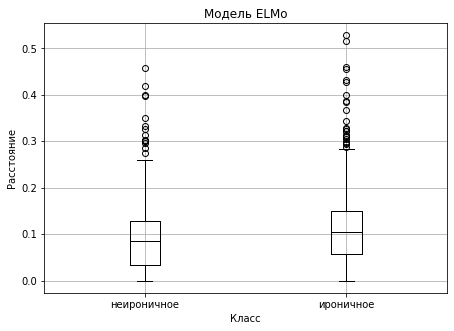

In [64]:
boxplot = new_df.boxplot(column='Max vec dist', by='Ironic',
                         figsize=(7,5), return_type='dict')

[[item.set_color('black') for item in boxplot[key]['boxes']] for key in boxplot.keys()]
[[item.set_color('black') for item in boxplot[key]['fliers']] for key in boxplot.keys()]
[[item.set_color('black') for item in boxplot[key]['medians']] for key in boxplot.keys()]
[[item.set_markerfacecolor('black') for item in boxplot[key]['means']] for key in boxplot.keys()]
[[item.set_color('black') for item in boxplot[key]['whiskers']] for key in boxplot.keys()]
[[item.set_color('black') for item in boxplot[key]['caps']] for key in boxplot.keys()]

plt.suptitle('')

boxplot = plt.gca()
boxplot.set_xlabel('Класс')
boxplot.set_ylabel('Расстояние')
boxplot.set_title('Модель ELMo')
boxplot.set_xticklabels(['неироничное', 'ироничное'])

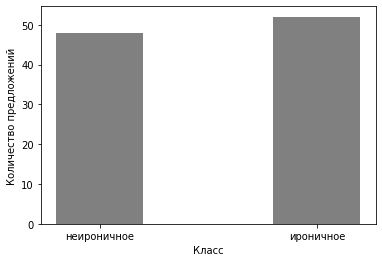

In [167]:
nonir = new_df[(new_df.Ironic == 0) & (new_df['Markers'] == 1)].count()['Sentence']
ir = new_df[(new_df.Ironic == 1) & (new_df['Markers'] == 1)].count()['Sentence']

plt.bar(['неироничное', 'ироничное'], [nonir, ir],
       color='gray', width=0.4)
plt.xlabel('Класс')
plt.ylabel('Количество предложений')
plt.show()

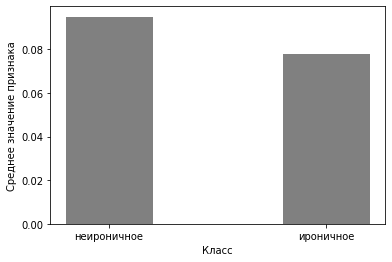

In [5]:
nonir = new_df[new_df.Ironic == 0]['Question'].mean()
ir = new_df[new_df.Ironic == 1]['Question'].mean()

plt.bar(['неироничное', 'ироничное'], [nonir, ir],
       color='gray', width=0.4)
plt.xlabel('Класс')
plt.ylabel('Среднее значение признака')
plt.show()

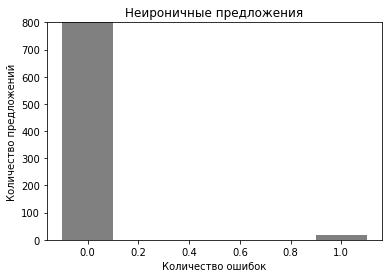

In [37]:
c = new_df[new_df.Ironic == 1]['Weird markers'].value_counts()
counts = c.to_dict()

plt.bar(counts.keys(), counts.values(),
       color='gray', width=0.2)
plt.xlabel('Количество маркеров')
plt.ylabel('Количество предложений')
plt.title('Неироничные предложения')

plt.ylim([0 ,800])
plt.show()

[Text(0, 0, 'неироничное'), Text(0, 0, 'ироничное')]

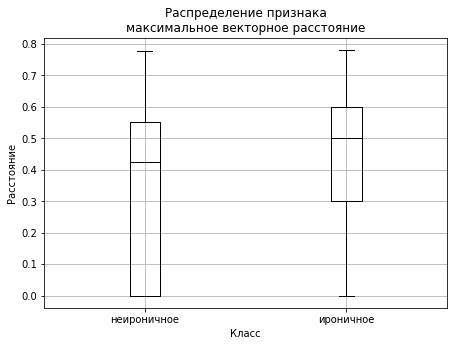

In [7]:
boxplot = new_df.boxplot(column='Max vec sg dist', by='Ironic',
                         figsize=(7,5), return_type='dict')

[[item.set_color('black') for item in boxplot[key]['boxes']] for key in boxplot.keys()]
[[item.set_color('black') for item in boxplot[key]['fliers']] for key in boxplot.keys()]
[[item.set_color('black') for item in boxplot[key]['medians']] for key in boxplot.keys()]
[[item.set_markerfacecolor('black') for item in boxplot[key]['means']] for key in boxplot.keys()]
[[item.set_color('black') for item in boxplot[key]['whiskers']] for key in boxplot.keys()]
[[item.set_color('black') for item in boxplot[key]['caps']] for key in boxplot.keys()]

plt.suptitle('')

boxplot = plt.gca()
boxplot.set_xlabel('Класс')
boxplot.set_ylabel('Расстояние')
boxplot.set_title('Распределение признака\nмаксимальное векторное расстояние')
boxplot.set_xticklabels(['неироничное', 'ироничное'])

### Testing models

#### Random classifier

In [33]:
rand_accuracies = []
rand_precisions = []
rand_recalls = []
rand_f1_scores = []

for i in range(10):
    truths = test_df[target]
    preds = choices([0,1], [0.5, 0.5], k=len(truths))
    rand_accuracies.append(accuracy_score(truths, preds))
    rand_precisions.append(precision_score(truths, preds))
    rand_recalls.append(recall_score(truths, preds))
    rand_f1_scores.append(f1_score(truths, preds))

print(mean(rand_accuracies))
print(mean(rand_precisions))
print(mean(rand_recalls))
print(mean(rand_f1_scores))

0.485
0.27584373444939003
0.44333333333333336
0.3392384245413302


#### Baseline Skip-gram

In [180]:
baseline_accuracies = []
baseline_precisions = []
baseline_recalls = []
baseline_f1_scores = []

for i in range(10):
    target = 'Ironic'
    b_feature = 'Max vec sg dist'

    b_regr = LogisticRegression()
    b_regr.fit(new_df[b_feature].values.reshape(-1, 1), new_df[target])
    
    preds = b_regr.predict(test_df[b_feature].values.reshape(-1, 1))
    truths = test_df[target]
    baseline_accuracies.append(accuracy_score(truths, preds))
    baseline_precisions.append(precision_score(truths, preds))
    baseline_recalls.append(recall_score(truths, preds))
    baseline_f1_scores.append(f1_score(truths, preds))

print(mean(baseline_accuracies))
print(mean(baseline_precisions))
print(mean(baseline_recalls))
print(mean(baseline_f1_scores))

0.51
0.28888888888888886
0.43333333333333335
0.3466666666666666


#### Baseline ELMo

In [73]:
baseline_accuracies = []
baseline_precisions = []
baseline_recalls = []
baseline_f1_scores = []

for i in range(10):
    target = 'Ironic'
    b_feature = 'Max vec dist'

    b_regr = LogisticRegression()
    b_regr.fit(new_df[b_feature].values.reshape(-1, 1), new_df[target])
    
    preds = b_regr.predict(test_df[b_feature].values.reshape(-1, 1))
    truths = test_df[target]
    baseline_accuracies.append(accuracy_score(truths, preds))
    baseline_precisions.append(precision_score(truths, preds))
    baseline_recalls.append(recall_score(truths, preds))
    baseline_f1_scores.append(f1_score(truths, preds))

print(mean(baseline_accuracies))
print(mean(baseline_precisions))
print(mean(baseline_recalls))
print(mean(baseline_f1_scores))

0.55
0.2727272727272727
0.3
0.28571428571428564


#### Full Skip-gram classifier

In [5]:
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1_scores = []

for i in range(10):
    target = 'Ironic'
    features = [col for col in new_df.columns
                if col not in {'Sentence', target, 'Markers', 'Max vec dist'}]
    st_regr = LogisticRegression()
    st_regr.fit(new_df[features], new_df[target])
    
    preds = st_regr.predict(test_df[features])
    truths = test_df[target]
    test_accuracies.append(accuracy_score(truths, preds))
    test_precisions.append(precision_score(truths, preds))
    test_recalls.append(recall_score(truths, preds))
    test_f1_scores.append(f1_score(truths, preds))

print(mean(test_accuracies))
print(mean(test_precisions))
print(mean(test_recalls))
print(mean(test_f1_scores))

0.61
0.3783783783783784
0.4666666666666667
0.417910447761194


In [10]:
# Skip-gram weights
weights = dict(zip(features, st_regr.coef_[0]))
for w in sorted(weights, key=weights.get, reverse=True):
    print(w, weights[w])

Quotes 1.503559957797086
Multiple brackets 1.4374001560876473
Exclamation 1.035022315737415
Weird markers 1.0073748534988582
Max vec sg dist 0.8630186626487908
P&N 0.5184854268913428
P near N 0.16927835211762793
Mistakes 0.09463720743657601
Question 0.029632419350281318
Interjections -0.46670519408988825


In [14]:
# save Skip-gram results
sents = test_df['Sentence']
answers_df = pd.DataFrame({'Sentence': sents,
                           'Prediction': preds,
                           'Label': truths})
true_pos = answers_df[(answers_df.Prediction == 1) & (answers_df.Label == 1)]
true_neg = answers_df[(answers_df.Prediction == 0) & (answers_df.Label == 0)]
false_pos = answers_df[(answers_df.Prediction == 1) & (answers_df.Label == 0)]
false_neg = answers_df[(answers_df.Prediction == 0) & (answers_df.Label == 1)]
to_save = pd.concat([true_pos, true_neg, false_pos, false_neg], sort=False, axis=0)
to_save.head(5)

,Sentence,Prediction,Label
0,Можете спать спокойно — террористы не пройдут!,1,1
2,Но у меня для вас прекрасные новости из Кургана!,1,1
6,"И, должен заметить, это не просто какие-то там...",1,1
13,Враг не пройдет!,1,1
14,"Но если вдруг вам все равно кажется, что через...",1,1


In [15]:
to_save.to_csv('test_results.csv', sep=';', index=False)

#### Full ELMo classifier

In [68]:
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1_scores = []

for i in range(10):
    target = 'Ironic'
    features = [col for col in new_df.columns
                if col not in {'Sentence', target, 'Markers', 'Max vec sg dist'}]
    et_regr = LogisticRegression()
    et_regr.fit(new_df[features], new_df[target])
    
    preds = et_regr.predict(test_df[features])
    truths = test_df[target]
    test_accuracies.append(accuracy_score(truths, preds))
    test_precisions.append(precision_score(truths, preds))
    test_recalls.append(recall_score(truths, preds))
    test_f1_scores.append(f1_score(truths, preds))

print(mean(test_accuracies))
print(mean(test_precisions))
print(mean(test_recalls))
print(mean(test_f1_scores))

0.6
0.3684210526315789
0.4666666666666667
0.4117647058823529


In [184]:
# ELMo weights
weights = dict(zip(features, et_regr.coef_[0]))
for w in sorted(weights, key=weights.get, reverse=True):
    print(w, weights[w])

Max vec dist 1.964047695311495
Quotes 1.5544134432373642
Multiple brackets 1.4310264779312305
Weird markers 1.0281346026555105
Exclamation 1.004891911500848
P&N 0.5836159508992513
P near N 0.18021553697010262
Mistakes 0.11825968307298843
Question -0.0032207542136431363
Interjections -0.42130638453692404


#### Classifier without vector feature

In [11]:
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1_scores = []

for i in range(10):
    target = 'Ironic'
    features = [col for col in new_df.columns
                if col not in {'Sentence', target, 'Markers', 'Max vec dist', 'Max vec sg dist'}]
    st_regr = LogisticRegression()
    st_regr.fit(new_df[features], new_df[target])
    
    preds = st_regr.predict(test_df[features])
    truths = test_df[target]
    test_accuracies.append(accuracy_score(truths, preds))
    test_precisions.append(precision_score(truths, preds))
    test_recalls.append(recall_score(truths, preds))
    test_f1_scores.append(f1_score(truths, preds))

print(mean(test_accuracies))
print(mean(test_precisions))
print(mean(test_recalls))
print(mean(test_f1_scores))

0.61
0.3783783783783784
0.4666666666666667
0.417910447761194


#### Confusion matrix code
replace model and plot title to plot another matrix

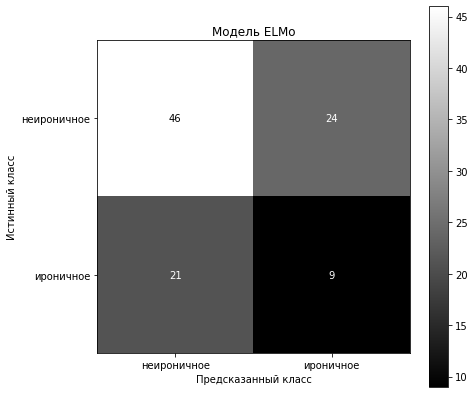

In [74]:
fig, ax = plt.subplots(figsize=(7, 7))
disp = plot_confusion_matrix(b_regr, test_df[b_feature].values.reshape(-1, 1), test_df[target],
                     display_labels=['неироничное', 'ироничное'], cmap='gray', ax=ax)
disp.ax_.set_title('Модель ELMo')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

### Sampling sentences for testing sentiment hypotheses

In [21]:
ironies = df.loc[df['Ironic'] == 1].sample(50)
non_ironies = df.loc[df['Ironic'] == 0].sample(50)
samp_df = pd.concat([ironies, non_ironies], sort=False, axis=0)
samp_df = samp_df.sample(frac=1).reset_index(drop=True)
samp_df.head(5)

,Sentence,Ironic
0,И спустя пару дней прибегал лакомиться уже с р...,0.0
1,— Годик?!,0.0
2,"Легкость, с которой элита по собственному разу...",1.0
3,Кто бы сомневался!,1.0
4,"Съемки нового фильма о герое комиксов DC, Чело...",0.0


In [9]:
def sent_tag(sent):
    result = []
    for word in word_tokenize(sent):
        if word.isalpha():
            lemma = m.parse(word)[0].normal_form
            if lemma in wordlist:
                tag = list(voc.loc[voc['term'] == lemma]['tag'])[0]
            else:
                tag = '-'
            result.append(tag)
    return ' '.join(result)

In [9]:
def sent_val(sent):
    result = []
    for word in word_tokenize(sent):
        if word.isalpha():
            lemma = m.parse(word)[0].normal_form
            if lemma in wordlist:
                value = str(list(voc.loc[voc['term'] == lemma]['value'])[0])
            else:
                value = '-'
            result.append(value)
    return ' '.join(result)

In [27]:
samp_df['P&N'] = samp_df['Sentence'].apply(contrast_tone, flag ='pos_and_neg')
samp_df['P near N'] = samp_df['Sentence'].apply(contrast_tone, flag ='pos_near_neg')

samp_df.head(5)

,Sentence,Ironic,Sent tags,Sent weights,P&N,P near N
0,"В духе того, что гаитяне не готовы к самостоятельному управлению государством.",0.0,- NEUT - - - - PSTV - PSTV NEUT NEUT,- 0.0 - - - - 0.6493 - 0.9444 0.364 0.2869,0,0
1,Стремительное бегство Путина из Сирии.,0.0,PSTV NGTV - - -,0.584 -0.514 - - -,1,1
2,Бальтазар — немой укор для всей нашей семьи.,1.0,- - NGTV - - - PSTV,- - -1.0 - - - 0.9828,1,0
3,"Если нельзя но очень хочется, то можно!",1.0,- NGTV - NEUT NEUT - NEUT,- -0.9828 - 0.0 0.3684 - 0.5382,0,0
4,Угнетение!!!11!1,1.0,NGTV,-1.0,0,0


In [14]:
samp_df['Sent tags'] = samp_df['Sentence'].apply(sent_tag)
samp_df['Sent weights'] = samp_df['Sentence'].apply(sent_val)

samp_df.head(5)

,Sentence,Ironic,Sent tags,Sent weights,P&N,P near N
0,"В духе того, что гаитяне не готовы к самостоятельному управлению государством.",0.0,- NEUT - - - - PSTV - PSTV NEUT NEUT,- 0.0 - - - - 0.6493 - 0.9444 0.364 0.2869,0,0
1,Стремительное бегство Путина из Сирии.,0.0,PSTV NGTV - - -,0.584 -0.514 - - -,0,0
2,Бальтазар — немой укор для всей нашей семьи.,1.0,- - NGTV - - - PSTV,- - -1.0 - - - 0.9828,0,0
3,"Если нельзя но очень хочется, то можно!",1.0,- NGTV - NEUT NEUT - NEUT,- -0.9828 - 0.0 0.3684 - 0.5382,0,0
4,Угнетение!!!11!1,1.0,NGTV,-1.0,0,0


In [93]:
samp_df.to_csv('Sentiment hypotheses testing.csv', index=False, sep=';')